In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [ ]:
train.head()

,image_id,wind_speed,storm_id,relative_time,ocean
0,abs_000,43,abs,0,2
1,abs_001,44,abs,1800,2
2,abs_002,45,abs,5400,2
3,abs_003,52,abs,17999,2
4,abs_004,53,abs,19799,2


In [ ]:
print(train.shape, test.shape)

(70257, 5) (44377, 5)


In [ ]:
train["wind_speed"].value_counts().to_dict()

{15: 433,
 16: 36,
 17: 35,
 18: 34,
 19: 41,
 20: 2795,
 21: 205,
 22: 184,
 23: 185,
 24: 219,
 25: 7154,
 26: 592,
 27: 493,
 28: 501,
 29: 601,
 30: 7145,
 31: 772,
 32: 644,
 33: 679,
 34: 778,
 35: 4234,
 36: 757,
 37: 651,
 38: 696,
 39: 794,
 40: 3029,
 41: 715,
 42: 604,
 43: 651,
 44: 710,
 45: 3517,
 46: 662,
 47: 537,
 48: 561,
 49: 631,
 50: 2182,
 51: 537,
 52: 481,
 53: 499,
 54: 541,
 55: 2302,
 56: 449,
 57: 430,
 58: 439,
 59: 458,
 60: 1330,
 61: 391,
 62: 394,
 63: 399,
 64: 406,
 65: 1297,
 66: 340,
 67: 324,
 68: 326,
 69: 329,
 70: 696,
 71: 276,
 72: 269,
 73: 257,
 74: 281,
 75: 784,
 76: 236,
 77: 231,
 78: 240,
 79: 254,
 80: 579,
 81: 217,
 82: 199,
 83: 218,
 84: 213,
 85: 604,
 86: 201,
 87: 177,
 88: 193,
 89: 190,
 90: 649,
 91: 188,
 92: 185,
 93: 200,
 94: 201,
 95: 344,
 96: 164,
 97: 161,
 98: 153,
 99: 173,
 100: 438,
 101: 156,
 102: 142,
 103: 146,
 104: 169,
 105: 344,
 106: 140,
 107: 133,
 108: 131,
 109: 143,
 110: 326,
 111: 135,
 112: 124,
 

In [ ]:
def create_bins(df):
  # specify condition
  conditions = [(df["wind_speed"] >= 15) & (df["wind_speed"] <= 20),
                (df["wind_speed"] >= 21) & (df["wind_speed"] <= 25),
                (df["wind_speed"] >= 26) & (df["wind_speed"] <= 30),
                (df["wind_speed"] >= 31) & (df["wind_speed"] <= 35),
                (df["wind_speed"] >= 36) & (df["wind_speed"] <= 40),
                (df["wind_speed"] >= 41) & (df["wind_speed"] <= 45),
                (df["wind_speed"] >= 46) & (df["wind_speed"] <= 50),
                (df["wind_speed"] >= 51) & (df["wind_speed"] <= 65),
                (df["wind_speed"] >= 66) & (df["wind_speed"] <= 100),
                (df["wind_speed"] > 100)]
                # (df["wind_speed"] >= 101) & (df["wind_speed"] <= 150),
                # (df["wind_speed"] >= 151)]

  # values = ["15 to 20", "21 to 25", "26 to 30", "31 to 35",
  #           "36 to 40", "41 to 45", "46 to 50", "51 to 70",
  #           "71 to 100", "101 to 150", ">150"]

  values = ["15 to 20", "21 to 25", "26 to 30", "31 to 35", 
            "36 to 40", "41 to 45", "46 to 50", "51 to 65", 
            "66 to 100", ">100"]
            # "71 to 100", "101 to 150", ">150"]

  df["Wind Labels"] = np.select(conditions, values)
  print("Bins created!")

  return df

In [ ]:
def create_bins(df):
  # specify condition
  conditions = [(df["wind_speed"] >= 15) & (df["wind_speed"] <= 25),
                (df["wind_speed"] >= 26) & (df["wind_speed"] <= 35),
                (df["wind_speed"] >= 36) & (df["wind_speed"] <= 45),
                (df["wind_speed"] >= 45) & (df["wind_speed"] <= 75),
                # (df["wind_speed"] >= 76) & (df["wind_speed"] <= 90),
                (df["wind_speed"] > 75)]

  values = ["15 to 25", "26 to 35", "36 to 45", "46 to 75", ">=76"]


  df["Wind Labels"] = np.select(conditions, values)
  print("Bins created!")

  return df

In [ ]:
train2 = create_bins(train)

Bins created!


In [ ]:
train2.head()

,image_id,wind_speed,storm_id,relative_time,ocean,Wind Labels
0,abs_000,43,abs,0,2,36 to 45
1,abs_001,44,abs,1800,2,36 to 45
2,abs_002,45,abs,5400,2,36 to 45
3,abs_003,52,abs,17999,2,46 to 75
4,abs_004,53,abs,19799,2,46 to 75


In [ ]:
train["Wind Labels"].value_counts()

46 to 75    18808
26 to 35    16439
36 to 45    12124
>=76        11565
15 to 25    11321
Name: Wind Labels, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


([<matplotlib.patches.Wedge at 0x7fbd574113d0>,
 [Text(0.733378730285645, 0.8198509852190307, '46 to 75'),
  Text(-0.823725455160583, 0.7290242619560001, '26 to 35'),
  Text(-0.9362033067627347, -0.5775148209410051, '36 to 45'),
  Text(0.0453131330360426, -1.0990662946221479, '>=76'),
  Text(0.9620383013573167, -0.5333688280369682, '15 to 25')])

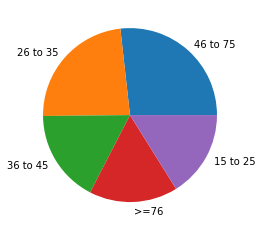

In [ ]:
plt.pie(train["Wind Labels"].value_counts(), labels=train["Wind Labels"].value_counts().index)

In [ ]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

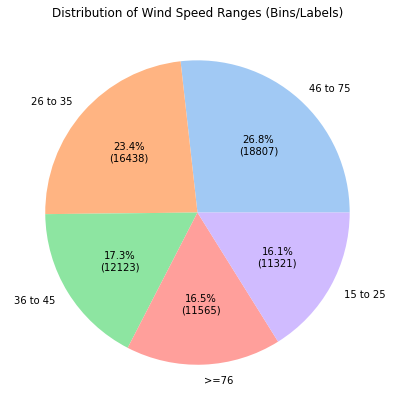

In [ ]:
data = train["Wind Labels"].value_counts()
labels = train["Wind Labels"].value_counts().index

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(7, 7))
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct=lambda pct: func(pct, data))
plt.title("Distribution of Wind Speed Ranges (Bins/Labels)")
plt.show()

In [ ]:
data.values

array([18808, 16439, 12124, 11565, 11321])